# Telecom Churn Rate - Case Study

## Reading and understanding the data

In [1]:
# Importing all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'telecom_churn_data.csv')

In [3]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
df_wor = df.copy()

In [6]:
df_wor.shape

(99999, 226)

### Filter high values customers.

##### for that check if total_rech_amt_6 is having nulls or total_rech_amt_7 is having nulls

In [7]:
print("total_rech_amt_7 is having {0} null values".format(df_wor['total_rech_amt_7'].isnull().sum()))
print("total_rech_amt_6 is having {0} null values".format(df_wor['total_rech_amt_6'].isnull().sum()))

total_rech_amt_7 is having 0 null values
total_rech_amt_6 is having 0 null values


##### Lets try to filter the rows based on the criteria
##### Find the average recharge amount

In [8]:
df_wor['avg_rech_amt']=(df_wor['total_rech_amt_6']+df_wor['total_rech_amt_7'])/2.0

##### find the 70th percentile of avg_rech_amt and filter the rows that are greater than it

In [9]:
df_wor = df_wor.loc[df_wor['avg_rech_amt']>=np.percentile(df_wor['avg_rech_amt'],70)]

In [10]:
df_wor.shape

(30011, 227)

In [11]:
df_wor.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.

##### find the percentage of missing values

In [12]:
missing_per_s = ((df_wor.isnull().sum()*100/len(df_wor)).sort_values(ascending=False))

##### There are many columns whose percenatge of missing values is greater than 60, so need to remove them

In [13]:
missing_per_s

count_rech_2g_6             62.023925
total_rech_data_6           62.023925
night_pck_user_6            62.023925
count_rech_3g_6             62.023925
date_of_last_rech_data_6    62.023925
arpu_2g_6                   62.023925
av_rech_amt_data_6          62.023925
fb_user_6                   62.023925
arpu_3g_6                   62.023925
max_rech_data_6             62.023925
arpu_2g_9                   61.810669
arpu_3g_9                   61.810669
date_of_last_rech_data_9    61.810669
total_rech_data_9           61.810669
night_pck_user_9            61.810669
av_rech_amt_data_9          61.810669
fb_user_9                   61.810669
count_rech_3g_9             61.810669
count_rech_2g_9             61.810669
max_rech_data_9             61.810669
total_rech_data_7           61.140915
max_rech_data_7             61.140915
arpu_3g_7                   61.140915
av_rech_amt_data_7          61.140915
arpu_2g_7                   61.140915
count_rech_3g_7             61.140915
night_pck_us

In [14]:
missing_per_s[missing_per_s>60].index

Index(['count_rech_2g_6', 'total_rech_data_6', 'night_pck_user_6',
       'count_rech_3g_6', 'date_of_last_rech_data_6', 'arpu_2g_6',
       'av_rech_amt_data_6', 'fb_user_6', 'arpu_3g_6', 'max_rech_data_6',
       'arpu_2g_9', 'arpu_3g_9', 'date_of_last_rech_data_9',
       'total_rech_data_9', 'night_pck_user_9', 'av_rech_amt_data_9',
       'fb_user_9', 'count_rech_3g_9', 'count_rech_2g_9', 'max_rech_data_9',
       'total_rech_data_7', 'max_rech_data_7', 'arpu_3g_7',
       'av_rech_amt_data_7', 'arpu_2g_7', 'count_rech_3g_7',
       'night_pck_user_7', 'count_rech_2g_7', 'date_of_last_rech_data_7',
       'fb_user_7', 'total_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8',
       'fb_user_8', 'av_rech_amt_data_8', 'max_rech_data_8',
       'date_of_last_rech_data_8', 'night_pck_user_8', 'arpu_2g_8',
       'arpu_3g_8'],
      dtype='object')

##### Drop all the above columns

In [15]:
df_wor = df_wor.drop(columns=missing_per_s[missing_per_s>60].index)

In [16]:
missing_per_s = ((df_wor.isnull().sum()*100/len(df_wor)).sort_values(ascending=False))

In [17]:
missing_per_s.sort_values(ascending=False)

std_ic_mou_9            5.677918
spl_ic_mou_9            5.677918
onnet_mou_9             5.677918
std_og_t2m_mou_9        5.677918
std_og_t2t_mou_9        5.677918
std_og_t2f_mou_9        5.677918
spl_og_mou_9            5.677918
isd_og_mou_9            5.677918
std_og_t2c_mou_9        5.677918
std_og_mou_9            5.677918
ic_others_9             5.677918
loc_ic_t2f_mou_9        5.677918
offnet_mou_9            5.677918
isd_ic_mou_9            5.677918
loc_og_t2f_mou_9        5.677918
og_others_9             5.677918
loc_og_t2m_mou_9        5.677918
roam_og_mou_9           5.677918
loc_og_mou_9            5.677918
loc_ic_t2m_mou_9        5.677918
loc_og_t2c_mou_9        5.677918
roam_ic_mou_9           5.677918
loc_ic_mou_9            5.677918
loc_ic_t2t_mou_9        5.677918
std_ic_t2t_mou_9        5.677918
loc_og_t2t_mou_9        5.677918
std_ic_t2f_mou_9        5.677918
std_ic_t2o_mou_9        5.677918
std_ic_t2m_mou_9        5.677918
onnet_mou_8             3.125521
loc_ic_t2f

In [18]:
df_wor.loc[df.std_ic_t2f_mou_8.isnull()].head(100)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt
111,7001300706,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,596.301,146.073,0.000,0.000,55.19,3.26,NaN,NaN,45.51,12.34,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,55.19,3.26,NaN,NaN,43.83,12.34,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,99.03,15.61,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,1.30,0.00,NaN,NaN,0.0,0.0,NaN,NaN,1.30,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.38,2.71,NaN,NaN,1.29,0.0,NaN,NaN,102.01,18.33,0.0,0.00,50.01,16.66,NaN,NaN,160.68,58.53,NaN,NaN,5.06,0.40,NaN,NaN,215.76,75.59,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,1.13,0.00,NaN,NaN,0.0,0.0,NaN,NaN,1.13,0.00,NaN,NaN,217.04,75.59,0.0,0.00,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.15,0.00,NaN,NaN,12,8,5,2,704,178,0,0,154,50,0,0,6/13/2014,7/27/2014,8/24/2014,9/21/2014,154,30,0,0,284.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,332,0.00,0.00,0.00,0.00,441.0
143,7000106299,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,695.609,39.981,0.000,0.000,1325.91,28.61,NaN,NaN,13.91,1.89,NaN,NaN,0.00,8.94,NaN,NaN,0.00,8.53,NaN,NaN,18.89,6.83,NaN,NaN,8.58,1.56,NaN,NaN,0.00,0.00,NaN,NaN,2.09,0.00,NaN,NaN,27.48,8.39,NaN,NaN,1307.01,13.58,NaN,NaN,1.95,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.0,0.0,NaN,NaN,1308.96,13.58,NaN,NaN,0.00,0.00,NaN,NaN,3

In [19]:
df_wor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Columns: 187 entries, mobile_number to avg_rech_amt
dtypes: float64(144), int64(35), object(8)
memory usage: 43.0+ MB


##### Checking Categorical Columns

In [20]:
df_wor.select_dtypes(exclude=[np.number]).head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
7,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/27/2014,7/25/2014,8/26/2014,9/30/2014
8,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/25/2014,7/31/2014,8/30/2014,9/30/2014
13,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/20/2014,7/22/2014,8/30/2014,9/26/2014
16,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/30/2014,7/31/2014,8/14/2014,9/10/2014
17,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/30/2014,7/30/2014,8/25/2014,9/29/2014


In [21]:
for column in df_wor.select_dtypes(exclude=[np.number]).head().columns:
    print(column,df_wor[column].value_counts())
#df_wor['last_date_of_month_6'].value_counts()

last_date_of_month_6 6/30/2014    30011
Name: last_date_of_month_6, dtype: int64
last_date_of_month_7 7/31/2014    29980
Name: last_date_of_month_7, dtype: int64
last_date_of_month_8 8/31/2014    29854
Name: last_date_of_month_8, dtype: int64
last_date_of_month_9 9/30/2014    29651
Name: last_date_of_month_9, dtype: int64
date_of_last_rech_6 6/30/2014    8724
6/29/2014    5589
6/28/2014    3716
6/27/2014    3244
6/26/2014    1839
6/25/2014    1312
6/24/2014    1078
6/23/2014     707
6/21/2014     587
6/22/2014     520
6/14/2014     468
6/20/2014     353
6/19/2014     350
6/17/2014     350
6/18/2014     301
6/16/2014     170
6/12/2014     128
6/13/2014     119
6/15/2014     116
6/11/2014      72
6/8/2014       42
6/7/2014       32
6/10/2014      29
6/5/2014       20
6/9/2014       19
6/3/2014       18
6/4/2014       15
6/2/2014       12
6/1/2014       11
6/6/2014        8
Name: date_of_last_rech_6, dtype: int64
date_of_last_rech_7 7/31/2014    7927
7/30/2014    5355
7/29/2014    3478
7/

Since there is only one value in some of the columns we will remove them.
df_wor = df_wor.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9'],axis=1)

##### Check all the columns having unique rows and drop if it comtains only one value

In [22]:
for col in df_wor.columns:
    if(df_wor[col].nunique()==1):
        df_wor = df_wor.drop(col,axis=1)

##### Lets introduce a new column "churn" values would be either 1 (churn) or 0 (non-churn)
##### we will calculate churn/non-churn based on the usage as mentioned in the problem statement

In [23]:
df_wor['churn'] = np.where(df_wor[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1)==0, 1,0)
df_wor.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt,churn
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,6/27/2014,7/25/2014,8/26/2014,9/30/2014,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00

##### Remove all the columns that end with 9 since we dont model on it

In [24]:
for col in df_wor.columns:
    if('_9' in col):
        df_wor = df_wor.drop(col,axis=1)

##### Remove 9th month column which is septemeber

In [25]:
df_wor = df_wor.drop('sep_vbc_3g',axis=1)

In [26]:
df_wor.select_dtypes(exclude=[np.number]).head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
7,6/27/2014,7/25/2014,8/26/2014
8,6/25/2014,7/31/2014,8/30/2014
13,6/20/2014,7/22/2014,8/30/2014
16,6/30/2014,7/31/2014,8/14/2014
17,6/30/2014,7/30/2014,8/25/2014


##### Imputing the above columns null data with mode

In [27]:
df_wor['date_of_last_rech_8'] = df_wor['date_of_last_rech_8'].fillna(df_wor['date_of_last_rech_8'].mode()[0])
df_wor['date_of_last_rech_7'] = df_wor['date_of_last_rech_7'].fillna(df_wor['date_of_last_rech_7'].mode()[0])
df_wor['date_of_last_rech_6'] = df_wor['date_of_last_rech_6'].fillna(df_wor['date_of_last_rech_6'].mode()[0])

##### Now we dont have nulls in categorical data

In [28]:
df_wor[['date_of_last_rech_8','date_of_last_rech_7','date_of_last_rech_6']].isnull().sum()

date_of_last_rech_8    0
date_of_last_rech_7    0
date_of_last_rech_6    0
dtype: int64

In [29]:
missing_per_s = ((df_wor.isnull().sum()*100/len(df_wor)).sort_values(ascending=False))
missing_per_s.drop(labels='mobile_number',inplace=True)
missing_per_s.sort_values(ascending=False)


isd_ic_mou_8           3.125521
loc_og_t2m_mou_8       3.125521
ic_others_8            3.125521
roam_ic_mou_8          3.125521
loc_ic_t2m_mou_8       3.125521
loc_ic_t2t_mou_8       3.125521
onnet_mou_8            3.125521
std_og_mou_8           3.125521
og_others_8            3.125521
offnet_mou_8           3.125521
loc_ic_t2f_mou_8       3.125521
std_ic_t2t_mou_8       3.125521
loc_ic_mou_8           3.125521
loc_og_t2t_mou_8       3.125521
spl_og_mou_8           3.125521
std_ic_t2m_mou_8       3.125521
std_og_t2f_mou_8       3.125521
loc_og_t2f_mou_8       3.125521
roam_og_mou_8          3.125521
isd_og_mou_8           3.125521
std_og_t2m_mou_8       3.125521
std_og_t2t_mou_8       3.125521
spl_ic_mou_8           3.125521
loc_og_mou_8           3.125521
std_ic_mou_8           3.125521
loc_og_t2c_mou_8       3.125521
std_ic_t2f_mou_8       3.125521
loc_og_t2m_mou_6       1.052947
loc_og_t2f_mou_6       1.052947
loc_og_t2t_mou_6       1.052947
std_og_t2f_mou_6       1.052947
std_og_t

In [30]:
continous_cols = [f for f in df_wor.columns if df_wor.dtypes[f] != 'object']
continous_cols.remove('mobile_number')
unpivot=pd.melt(df_wor,value_vars = continous_cols)
unpivot.tail(100)

,variable,value
3781286,churn,0.0
3781287,churn,0.0
3781288,churn,0.0
3781289,churn,0.0
3781290,churn,0.0
3781291,churn,0.0
3781292,churn,0.0
3781293,churn,0.0
3781294,churn,1.0
3781295,churn,0.0


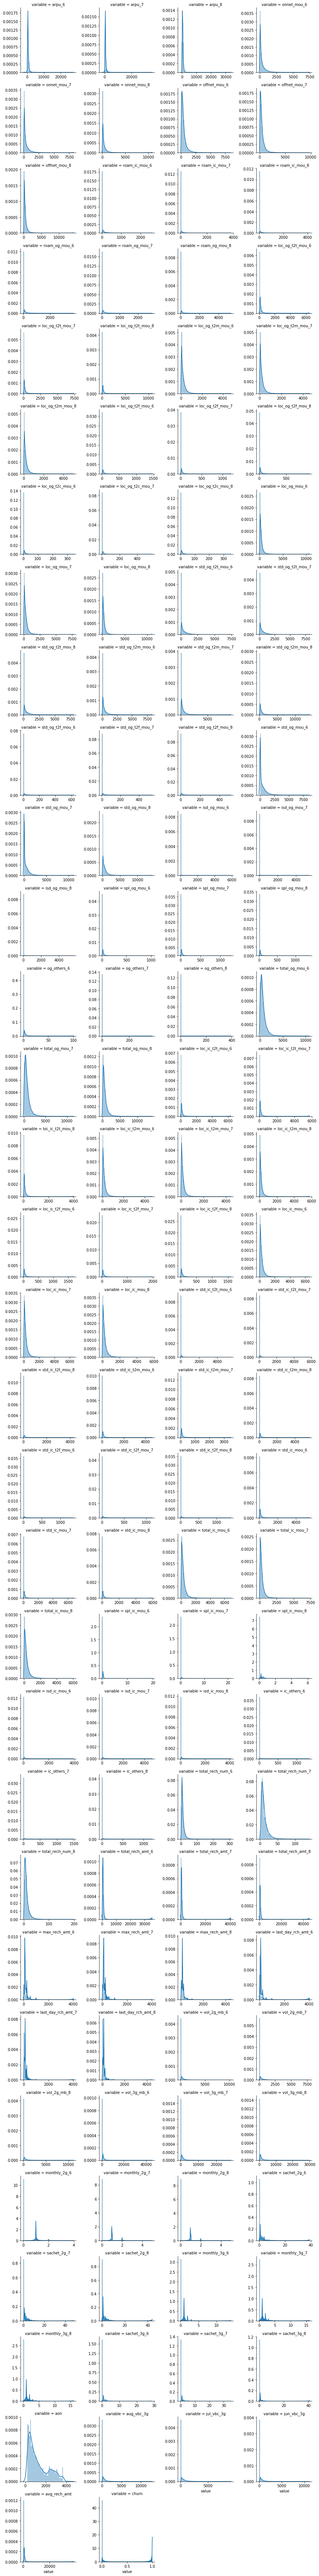

In [31]:
g = sns.FacetGrid (unpivot, col='variable', col_wrap=4, sharex=False, sharey = False)
g = g.map(sns.distplot, 'value')
g
#By Observation all these plots look like right skewed, we may have to adjust the skew ness

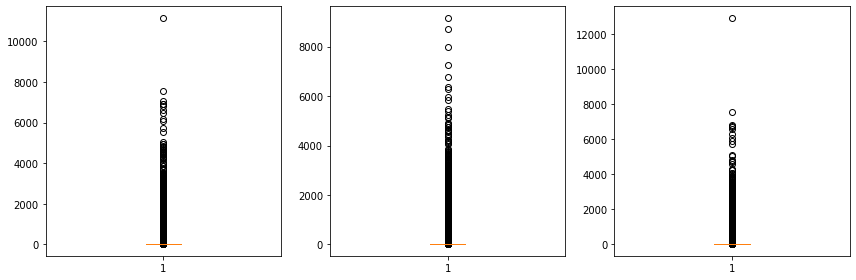

In [32]:
fig, axes = plt.subplots(1,3, figsize = (12,4))
axes[0].boxplot(df_wor['jun_vbc_3g'])
axes[1].boxplot(df_wor['jul_vbc_3g'])
axes[2].boxplot(df_wor['aug_vbc_3g'])
fig.tight_layout()
plt.show()

##### Cap jun,jul,aug columns to their respective 99% value

In [33]:
df_wor.loc[df_wor['jun_vbc_3g']>df_wor['jun_vbc_3g'].quantile([0.99]).values[0],'jun_vbc_3g'] = df_wor['jun_vbc_3g'].quantile([0.99]).values[0]

In [34]:
df_wor.loc[df_wor['aug_vbc_3g']>df_wor['aug_vbc_3g'].quantile([0.99]).values[0],'aug_vbc_3g'] = df_wor['aug_vbc_3g'].quantile([0.99]).values[0]

In [35]:
df_wor.loc[df_wor['jul_vbc_3g']>df_wor['jul_vbc_3g'].quantile([0.99]).values[0],'jul_vbc_3g'] = df_wor['jul_vbc_3g'].quantile([0.99]).values[0]

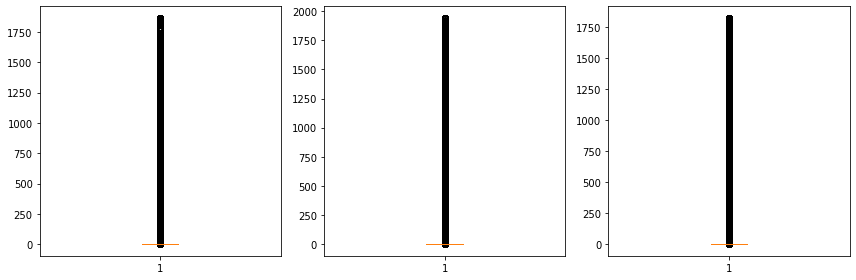

In [36]:
fig, axes = plt.subplots(1,3, figsize = (12,4))
axes[0].boxplot(df_wor['jun_vbc_3g'])
axes[1].boxplot(df_wor['jul_vbc_3g'])
axes[2].boxplot(df_wor['aug_vbc_3g'])
fig.tight_layout()
plt.show()

In [37]:
cat_cols = [f for f in df_wor.columns if df_wor.dtypes[f] == 'object']
unpivot=pd.melt(df_wor,value_vars = cat_cols)
unpivot.tail(100)

,variable,value
89933,date_of_last_rech_8,8/31/2014
89934,date_of_last_rech_8,8/29/2014
89935,date_of_last_rech_8,8/30/2014
89936,date_of_last_rech_8,8/29/2014
89937,date_of_last_rech_8,8/31/2014
89938,date_of_last_rech_8,8/29/2014
89939,date_of_last_rech_8,8/29/2014
89940,date_of_last_rech_8,8/25/2014
89941,date_of_last_rech_8,8/24/2014
89942,date_of_last_rech_8,8/31/2014


<Figure size 720x288 with 0 Axes>

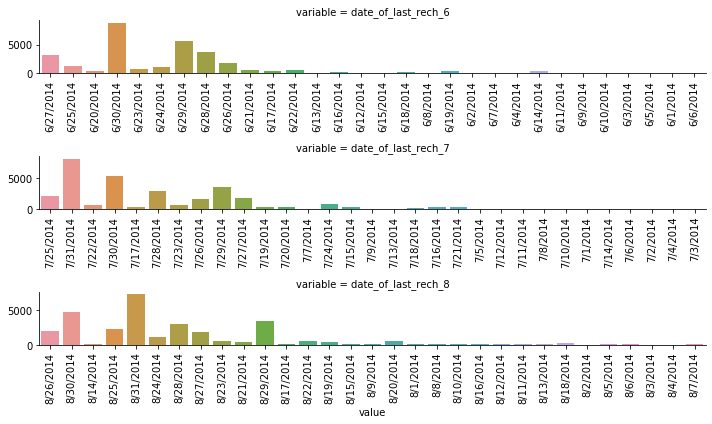

In [38]:
def countplot(x,**kwargs):
    sns.countplot(x=x)
    x = plt.xticks(rotation=90)
plt.figure(figsize=(10,4))
g = sns.FacetGrid (unpivot, col='variable', col_wrap=1, sharex=False, sharey = False,height=2, aspect=5)
g = g.map(countplot, 'value')

##### By looking into the above plot we can say that people generally recharge in the last few days of the month, rather than in the first few days which is quite intutive, so we can group them.

In [39]:
df_wor.loc[~df_wor['date_of_last_rech_7'].isin(['7/31/2014','7/30/2014','7/29/2014','7/28/2014','7/27/2014','7/26/2014']),'date_of_last_rech_7_bin']='other'

In [40]:
df_wor.loc[~df_wor['date_of_last_rech_6'].isin(['6/30/2014','6/29/2014','6/28/2014','6/27/2014','6/26/2014','6/25/2014']),'date_of_last_rech_6_bin']='other'

In [41]:
df_wor.loc[~df_wor['date_of_last_rech_8'].isin(['8/31/2014','8/30/2014','8/29/2014','8/28/2014','8/27/2014','8/26/2014','8/25/2014']),'date_of_last_rech_8_bin']='other'

In [42]:
df_wor['date_of_last_rech_7_bin'].fillna('most_recharge',inplace=True)

In [43]:
df_wor['date_of_last_rech_8_bin'].fillna('most_recharge',inplace=True)
df_wor['date_of_last_rech_6_bin'].fillna('most_recharge',inplace=True)

##### Let's drop date of last recharges as well

In [44]:
df_wor.drop(columns=['date_of_last_rech_8','date_of_last_rech_7','date_of_last_rech_6'],axis=1,inplace=True)

##### Create dummies for categorical valriables

In [45]:
dummy1 = pd.get_dummies(df_wor['date_of_last_rech_6_bin'],prefix='last_rech_6')
dummy2 = pd.get_dummies(df_wor['date_of_last_rech_7_bin'],prefix='last_rech_7')
dummy3 = pd.get_dummies(df_wor['date_of_last_rech_8_bin'],prefix='last_rech_8')

In [46]:
df_wor = pd.concat([df_wor, dummy1, dummy2, dummy3], axis = 1)

##### drop the catgorical columns now

In [47]:
df_wor.drop(columns=['date_of_last_rech_6_bin','date_of_last_rech_7_bin','date_of_last_rech_8_bin'],axis=1,inplace=True)

In [48]:
df_wor.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt,churn,last_rech_6_most_recharge,last_rech_6_other,last_rech_7_most_recharge,last_rech_7_other,last_rech_8_most_recharge,last_rech_8_other
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1,1,0,0,1,1,0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,1,0,1,0,1,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,0,1,0,1,1,0
1

##### Let's use Iterative Imputer to impute the missing values

In [49]:
from fancyimpute import IterativeImputer

In [50]:
df_col = df_wor.columns

In [51]:
ii = IterativeImputer()

In [52]:
df_clean = pd.DataFrame(ii.fit_transform(df_wor))
df_clean.columns = df_col
df_clean.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt,churn,last_rech_6_most_recharge,last_rech_6_other,last_rech_7_most_recharge,last_rech_7_other,last_rech_8_most_recharge,last_rech_8_other
0,7.000702e+09,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,1185.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,7.001525e+09,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,21.03,910.65,122.16,519.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,7.002192e+09,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44

In [53]:
100*df_clean.isnull().sum()/len(df_clean)

mobile_number                0.0
arpu_6                       0.0
arpu_7                       0.0
arpu_8                       0.0
onnet_mou_6                  0.0
onnet_mou_7                  0.0
onnet_mou_8                  0.0
offnet_mou_6                 0.0
offnet_mou_7                 0.0
offnet_mou_8                 0.0
roam_ic_mou_6                0.0
roam_ic_mou_7                0.0
roam_ic_mou_8                0.0
roam_og_mou_6                0.0
roam_og_mou_7                0.0
roam_og_mou_8                0.0
loc_og_t2t_mou_6             0.0
loc_og_t2t_mou_7             0.0
loc_og_t2t_mou_8             0.0
loc_og_t2m_mou_6             0.0
loc_og_t2m_mou_7             0.0
loc_og_t2m_mou_8             0.0
loc_og_t2f_mou_6             0.0
loc_og_t2f_mou_7             0.0
loc_og_t2f_mou_8             0.0
loc_og_t2c_mou_6             0.0
loc_og_t2c_mou_7             0.0
loc_og_t2c_mou_8             0.0
loc_og_mou_6                 0.0
loc_og_mou_7                 0.0
loc_og_mou

There is no missing value present in the data...

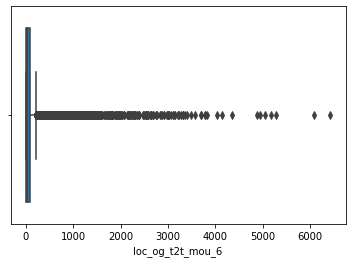

In [54]:
# Cross-check if the imputations are correct or not?
sns.boxplot(df_wor['loc_og_t2t_mou_6'])

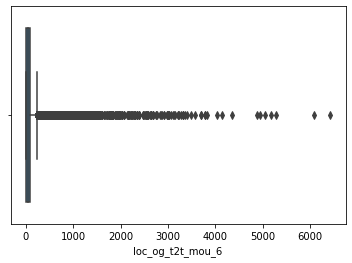

In [55]:
sns.boxplot(df_clean['loc_og_t2t_mou_6'])

In [56]:
X = df_clean.drop(['churn'], axis = 1)
y = df_clean.churn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=100, stratify = y)

In [57]:
X_test.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt,last_rech_6_most_recharge,last_rech_6_other,last_rech_7_most_recharge,last_rech_7_other,last_rech_8_most_recharge,last_rech_8_other
15057,7.002157e+09,552.464,382.266,134.767,556.06,753.88,157.23,299.48,346.31,96.09,0.00,0.00,0.0,0.00,0.0,0.0,2.18,9.98,7.99,36.81,31.23,29.21,0.00,0.00,0.00,0.00,0.00,1.63,38.99,41.21,37.21,553.88,743.89,149.23,243.88,306.89,59.66,0.00,0.00,0.00,797.76,1050.79,208.89,0.0,0.0,0.0,20.34,19.23,14.48,4.59,0.0,0.0,861.71,1111.24,260.59,2.81,8.31,5.64,10.61,9.86,7.38,192.79,0.00,0.00,206.23,18.18,13.03,4.69,73.43,59.19,7.54,2.79,3.31,7.81,5.54,0.00,20.06,81.78,62.51,227.78,119.89,81.83,0.00,0.0,0.0,0.0,18.89,4.73,1.48,1.03,1.55,12.0,5.0,3.0,643.0,516.0,180.0,120.0,120.0,130.0,50.0,120.0,50.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,798.0,0.00,0.00,0.00,579.5,1.0,0.0,0.0,1.0,1.0,0.0
6223,7.000192e+09,615.635,606.541,527.329,347.51,310.36,170.69,399.43,477.51,411.88,0.00,2.45,0.0,0.00,4.8,0.0,284.66,248.08,160.41,369.56,460.34,392.04,3.89,14.26,1.35,0.00,0.00,0.00,658.13,722.69,553.81,62.84,59.39,10.28,25.96,0.98,15.24,0.00,0.00,1.88,88.81,60.38,27.41,0.0,0.0,0.0,1.91,4.33,8.96,6.53,0.0,0.0,755.39,787.41,590.19,257.44,233.21,109.28,220.33,284.54,267.99,5.94,6.26,2.16,483.73,524.03,379.44,13.68,3.13,6.74,25.49,4.49,22.04,0.00,0.00,2.86,39.18,7.63,31.66,522.99,531.88,411.36,0.08,0.0,0.0,0.0,0.00,0.00,0.00,0.21,0.25,22.0,21.0,17.0,727.0,707.0,687.0,110.0,120.0,130.0,30.0,120.0,130.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1094.0,0.00,0.00,0.00,717.0,1.0,0.0,1.0,0.0,1.0,0.0
15321,7.001565e+09,1035.230,1151.881,960.163,212.13,482.36,403.53,771.16,719.53,506.08,1.30,0.00,0.0,0.00,0.0,0.0,212.13,480.54,399.89,596.66,635.36,465.11,7.66,5.01,1.51,34.38,4.08,0.00,816.46,1120.93,866.53,0.00,1.81,3.63,132.38,75.06,38.34,0.06,0.00,0.00,132.44,76.88,41.98,0.0,0.0,0.0,36.28,6.03,1.09,0.91,0.0,0.0,986.11,1203.84,909.61,3137.61,2386.89,2079.59,322.31,153.79,390.06,6.93,73.79,12.38,3466.86,2614.49,2482.04,0.00,13.73,0.00,81.81,3.61,0.46,2.61,0.00,0.28,84.43,17.34,0.74,3551.29,2631.84,2482.79,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,12.0,14.0,8.0,1217.0,1472.0,1010.0,159.0,2

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
X.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8',
       ...
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'avg_rech_amt',
       'last_rech_6_most_recharge', 'last_rech_6_other',
       'last_rech_7_most_recharge', 'last_rech_7_other',
       'last_rech_8_most_recharge', 'last_rech_8_other'],
      dtype='object', length=132)

In [60]:
X_train = pd.DataFrame(X_train,columns=X.columns)
X_test = pd.DataFrame(X_test,columns=X.columns)

In [61]:
X_test.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt,last_rech_6_most_recharge,last_rech_6_other,last_rech_7_most_recharge,last_rech_7_other,last_rech_8_most_recharge,last_rech_8_other
0,0.894841,0.158408,0.127232,0.053384,0.084229,0.092412,0.014623,0.035813,0.035823,0.006860,0.000000,0.005359,0.011694,0.000000,0.000000,0.0,0.000339,0.001566,0.000743,0.007783,0.006853,0.005888,0.000000,0.000000,0.000000,0.000000,0.000000,0.004633,0.003663,0.006419,0.003370,0.084012,0.091458,0.020021,0.029331,0.033053,0.004277,0.000000,0.000000,0.000000,0.094600,0.096079,0.014942,0.0,0.0,0.0,0.019879,0.015192,0.010411,0.907422,0.654725,0.613587,0.080730,0.097775,0.018556,0.000442,0.001636,0.001420,0.002384,0.002247,0.001286,0.114865,0.000000,0.000000,0.031747,0.003378,0.002267,0.000859,0.012658,0.013735,0.001628,0.000900,0.000586,0.005780,0.005026,0.000000,0.003674,0.014097,0.010493,0.033504,0.020487,0.013659,0.084543,0.0,0.374861,0.0,0.003979,0.001378,0.144782,0.131337,0.150822,0.039088,0.036232,0.015306,0.034757,0.026869,0.008821,0.029925,0.029925,0.029220,0.012469,0.029925,0.011238,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.149239,0.000000,0.00000,0.000000,0.011479,1.0,0.0,0.0,1.0,1.0,0.0
1,0.079741,0.161968,0.139140,0.072777,0.052639,0.038045,0.015874,0.047765,0.049395,0.029405,0.000000,0.005999,0.011694,0.000000,0.002555,0.0,0.044261,0.038933,0.014918,0.078135,0.101015,0.079019,0.002653,0.011919,0.001454,0.000000,0.000000,0.000000,0.061835,0.112572,0.050164,0.009531,0.007302,0.001379,0.003122,0.000106,0.001092,0.000000,0.000000,0.003637,0.010531,0.005521,0.001961,0.0,0.0,0.0,0.001867,0.003421,0.006442,0.910001,0.654725,0.613587,0.070769,0.069282,0.042027,0.040533,0.045900,0.027513,0.049504,0.064834,0.046701,0.003539,0.004494,0.001360,0.074465,0.097366,0.066003,0.002506,0.000540,0.001564,0.005505,0.001448,0.003904,0.000000,0.000000,0.002050,0.007176,0.001315,0.005315,0.076926,0.090888,0.068666,0.095409,0.0,0.374861,0.0,0.000000,0.000000,0.143840,0.130860,0.149908,0.071661,0.152174,0.086735,0.039297,0.036815,0.033668,0.027431,0.029925,0.029220,0.007481,0.029925,0.029220,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,

## Modelling

In [62]:
# lets check the balancing

100*y_train.value_counts()/len(y)

0.0    63.949885
1.0     6.047782
Name: churn, dtype: float64

##### Feature selection using RFE

In [63]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [64]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [65]:
X_train.columns[rfe.support_]
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_test_rfe = X_test[X_train.columns[rfe.support_]]


##### VIF and P value check to remove mutlicoliniarity

In [66]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
#print(len(y_train),len(X_train_rfe),y_train.shape,X_train_rfe.shape,y_train_sm.shape)

In [68]:
y_train_sm = y_train.values.reshape(-1,1)

In [69]:
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20991
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3829.4
Date:                Mon, 06 Jul 2020   Deviance:                       7658.9
Time:                        22:53:19   Pearson chi2:                 3.98e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.2876      0.187     12.251      0.000       1.922       2.654
roam_og_mou_7          3.4115      0.448      7.620      0.000       2.534       4.289
loc_og_t2m_mou_8      -6.2016      2.309     -2.686      0.007     -10.727      -1.676
std_og_mou_7           5.8799      0.734      8.012      0.000       4.442       7.318
total_og_mou_8       -14.6752      1.575     -9.317      0.000     -17.762     -11.588
loc_ic_t2m_mou_8     -14.2923      6.475     -2.207      0.027     -26.984      -1.601
loc_ic_mou_8          -4.8607      5.291     -0.919      0.358     -15.230       5.509
total_ic_mou_8       -12.1328      3.058     -3.967      0.000     -18.127      -6.138
spl_ic_mou_8          -8.7340      0.483    -18.097      0.000      -9.680      -7.788
total_rech_num_8      -7.9732      1.256     -6.348      0.000     -10.435      -5.511
total_rech_amt_8      -5.3651      3.079     -1.742      0.081     -11.400       0.670
max_rech_amt_8         0.2599      1.414      0.184      0.854      -2.512       3.032
last_day_rch_amt_8   -21.3479      2.155     -9.904      0.000     -25.572     -17.123
monthly_2g_8          -7.5318      1.026     -7.342      0.000      -9.542      -5.521
monthly_3g_8         -20.4990      2.413     -8.495      0.000     -25.229     -15.769
avg_rech_amt          16.3643      1.924      8.506      0.000      12.594      20.135
======================================================================================
"""

In [70]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
5,loc_ic_mou_8,11.82
9,total_rech_amt_8,8.81
6,total_ic_mou_8,7.93
4,loc_ic_t2m_mou_8,6.23
3,total_og_mou_8,5.71
10,max_rech_amt_8,4.70
7,spl_ic_mou_8,4.35
8,total_rech_num_8,3.52
2,std_og_mou_7,3.43
14,avg_rech_amt,3.20


#### Since loc_ic_mou_8 is having a high VIF and high P Value, we are going to drop it first

In [71]:
X_train_rfe = X_train_rfe.drop('loc_ic_mou_8',axis=1)

In [72]:
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20992
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3829.9
Date:                Mon, 06 Jul 2020   Deviance:                       7659.7
Time:                        22:53:21   Pearson chi2:                 4.67e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.2057      0.167     13.222      0.000       1.879       2.533
roam_og_mou_7          3.4253      0.448      7.653      0.000       2.548       4.303
loc_og_t2m_mou_8      -6.3075      2.313     -2.727      0.006     -10.840      -1.774
std_og_mou_7           5.9304      0.732      8.102      0.000       4.496       7.365
total_og_mou_8       -14.7092      1.575     -9.340      0.000     -17.796     -11.622
loc_ic_t2m_mou_8     -18.1108      4.845     -3.738      0.000     -27.607      -8.615
total_ic_mou_8       -13.9452      2.468     -5.651      0.000     -18.782      -9.109
spl_ic_mou_8          -8.5255      0.434    -19.666      0.000      -9.375      -7.676
total_rech_num_8      -7.9566      1.256     -6.333      0.000     -10.419      -5.494
total_rech_amt_8      -5.3144      3.085     -1.723      0.085     -11.361       0.732
max_rech_amt_8         0.2956      1.414      0.209      0.834      -2.477       3.068
last_day_rch_amt_8   -21.3797      2.156     -9.917      0.000     -25.605     -17.154
monthly_2g_8          -7.5448      1.026     -7.354      0.000      -9.556      -5.534
monthly_3g_8         -20.5306      2.414     -8.503      0.000     -25.263     -15.799
avg_rech_amt          16.3383      1.923      8.496      0.000      12.569      20.107
======================================================================================
"""

In [73]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
8,total_rech_amt_8,8.77
3,total_og_mou_8,5.70
9,max_rech_amt_8,4.70
6,spl_ic_mou_8,4.35
5,total_ic_mou_8,4.27
4,loc_ic_t2m_mou_8,4.18
7,total_rech_num_8,3.52
2,std_og_mou_7,3.41
13,avg_rech_amt,3.19
10,last_day_rch_amt_8,2.97


##### Then after running statsmodel again, total_rech_amt_8 found to have a high P value and high VIF, so let's drop it, similarly for others

In [74]:
X_train_rfe = X_train_rfe.drop('total_rech_amt_8',axis=1)

In [75]:
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20993
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3831.3
Date:                Mon, 06 Jul 2020   Deviance:                       7662.6
Time:                        22:53:23   Pearson chi2:                 4.90e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.2267      0.166     13.379      0.000       1.900       2.553
roam_og_mou_7          3.2960      0.433      7.605      0.000       2.447       4.145
loc_og_t2m_mou_8      -6.3244      2.315     -2.731      0.006     -10.863      -1.786
std_og_mou_7           6.2051      0.705      8.806      0.000       4.824       7.586
total_og_mou_8       -15.6554      1.477    -10.601      0.000     -18.550     -12.761
loc_ic_t2m_mou_8     -17.7392      4.837     -3.667      0.000     -27.220      -8.258
total_ic_mou_8       -14.1484      2.468     -5.733      0.000     -18.985      -9.312
spl_ic_mou_8          -8.4975      0.434    -19.597      0.000      -9.347      -7.648
total_rech_num_8      -9.0655      1.090     -8.317      0.000     -11.202      -6.929
max_rech_amt_8        -0.9507      1.219     -0.780      0.435      -3.339       1.438
last_day_rch_amt_8   -22.4399      2.070    -10.838      0.000     -26.498     -18.382
monthly_2g_8          -7.6010      1.025     -7.419      0.000      -9.609      -5.593
monthly_3g_8         -20.4522      2.395     -8.540      0.000     -25.146     -15.758
avg_rech_amt          14.6487      1.565      9.357      0.000      11.580      17.717
======================================================================================
"""

In [76]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,total_og_mou_8,4.72
6,spl_ic_mou_8,4.32
5,total_ic_mou_8,4.27
8,max_rech_amt_8,4.22
4,loc_ic_t2m_mou_8,4.18
2,std_og_mou_7,3.28
7,total_rech_num_8,2.88
9,last_day_rch_amt_8,2.88
1,loc_og_t2m_mou_8,2.77
12,avg_rech_amt,2.29


In [77]:
X_train_rfe = X_train_rfe.drop('max_rech_amt_8',axis=1)

In [78]:
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20994
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3831.6
Date:                Mon, 06 Jul 2020   Deviance:                       7663.3
Time:                        22:53:24   Pearson chi2:                 5.37e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.2217      0.166     13.354      0.000       1.896       2.548
roam_og_mou_7          3.2898      0.434      7.585      0.000       2.440       4.140
loc_og_t2m_mou_8      -6.4276      2.321     -2.769      0.006     -10.976      -1.879
std_og_mou_7           6.2718      0.702      8.933      0.000       4.896       7.648
total_og_mou_8       -15.8421      1.463    -10.829      0.000     -18.709     -12.975
loc_ic_t2m_mou_8     -17.5973      4.844     -3.633      0.000     -27.092      -8.103
total_ic_mou_8       -14.2922      2.469     -5.788      0.000     -19.132      -9.452
spl_ic_mou_8          -8.5134      0.433    -19.641      0.000      -9.363      -7.664
total_rech_num_8      -8.9853      1.086     -8.274      0.000     -11.114      -6.857
last_day_rch_amt_8   -22.8345      1.993    -11.455      0.000     -26.741     -18.928
monthly_2g_8          -7.6719      1.021     -7.515      0.000      -9.673      -5.671
monthly_3g_8         -20.9398      2.324     -9.008      0.000     -25.496     -16.384
avg_rech_amt          14.2841      1.509      9.464      0.000      11.326      17.242
======================================================================================
"""

In [79]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,total_og_mou_8,4.70
5,total_ic_mou_8,4.26
4,loc_ic_t2m_mou_8,4.18
6,spl_ic_mou_8,3.91
2,std_og_mou_7,3.27
7,total_rech_num_8,2.83
1,loc_og_t2m_mou_8,2.77
11,avg_rech_amt,2.19
8,last_day_rch_amt_8,1.77
10,monthly_3g_8,1.19


##### As we have removed columns from train data , we are removing coliumns from test data as well

In [80]:
X_test_rfe = X_test_rfe.drop(['loc_ic_mou_8','total_rech_amt_8','max_rech_amt_8'],axis=1)

In [151]:
from sklearn import metrics

logreg_1 = LogisticRegression(class_weight = 'balanced')
logreg_1.fit(X_train_rfe,y_train)

y_pred = logreg_1.predict(X_test_rfe)
print("Accuracy {}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity {}".format(metrics.recall_score(y_test, y_pred)))

Accuracy 0.8356286095068858
Recall/Sensitivity 0.7969151670951157


In [ ]:
y_pred

### Apply PCA on Data 

In [82]:
from sklearn.decomposition import PCA

In [83]:
pca = PCA(random_state=42)

In [84]:
pca.fit(X_train_rfe)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

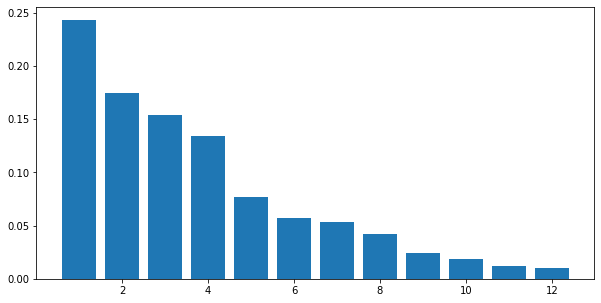

In [85]:
#Bar plot
plt.figure(figsize=(10,5))
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

##### Scee plot for cumulative variance

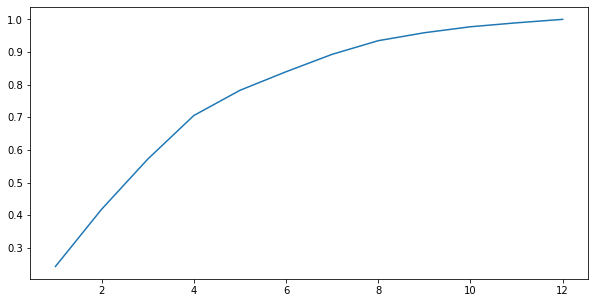

In [86]:
plt.figure(figsize=(10,5))
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_.cumsum())
plt.show()

##### Since 90% of Covariance is being explained by 8 components, we can go with 8

In [87]:
pca_1 = PCA(n_components=8,random_state=42)

In [88]:
X_train_pca_1 = pca_1.fit_transform(X_train_rfe)

In [89]:
X_test_pca_1 = pca_1.transform(X_test_rfe)

In [90]:
X_train_pca_1 = pd.DataFrame(X_train_pca_1,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

In [91]:
X_test_pca_1 = pd.DataFrame(X_test_pca_1,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

In [92]:
len(X_test_pca_1)

9004

##### Apply Logistic Regression on the new PCA obtained data

In [93]:
from sklearn import metrics

logreg = LogisticRegression(class_weight = 'balanced')
logreg.fit(X_train_pca_1,y_train)

y_pred = logreg.predict(X_test_pca_1)
print("Accuracy {}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity {}".format(metrics.recall_score(y_test, y_pred)))

Accuracy 0.8045313194135939
Recall/Sensitivity 0.794344473007712


In [94]:
#Logistic Regression before PCA
#Accuracy 0.8354064860062195
#Recall/Sensitivity 0.7982005141388174

### Apply Decision Tree on the new PCA obtained data

In [95]:
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(max_depth=5,class_weight = 'balanced')
dt_default.fit(X_train_pca_1,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

##### Let's check the evaluation metrics of our default model

In [96]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test_pca_1)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

         0.0       0.97      0.86      0.91      8226
         1.0       0.34      0.75      0.46       778

    accuracy                           0.85      9004
   macro avg       0.66      0.80      0.69      9004
weighted avg       0.92      0.85      0.88      9004



In [97]:
print("Accuracy {}".format(metrics.accuracy_score(y_test, y_pred_default)))
print("Recall/Sensitivity {}".format(metrics.recall_score(y_test, y_pred_default)))

Accuracy 0.8516215015548645
Recall/Sensitivity 0.7455012853470437


#### Tuning the Max Depth

##### GridSearchCV to find optimal n_estimators

In [98]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = DecisionTreeClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca_1, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(2, 20, 5)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scori

##### scores of GridSearch CV

In [99]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.080154,0.010828,0.005797,0.001599,2,{'max_depth': 2},0.935507,0.938125,0.937396,0.933825,0.929065,0.934784,0.003229,1,0.935198,0.934543,0.934726,0.935618,0.936808,0.935379,0.000807
1,0.351198,0.094684,0.005998,0.002529,7,{'max_depth': 7},0.932889,0.936697,0.932397,0.928350,0.930731,0.932213,0.002746,2,0.942517,0.941922,0.943473,0.944068,0.943830,0.943162,0.000814
2,0.417568,0.038215,0.005596,0.000490,12,{'max_depth': 12},0.920752,0.928605,0.921923,0.921209,0.918591,0.922216,0.003383,3,0.968164,0.966677,0.968821,0.968404,0.969535,0.968320,0.000944
3,0.515118,0.051992,0.010593,0.009744,17,{'max_depth': 17},0.912661,0.916230,0.908117,0.909069,0.904308,0.910078,0.004066,4,0.987623,0.986671,0.990896,0.990777,0.987445,0.988682,0.001788


##### plotting accuracies with max_depth

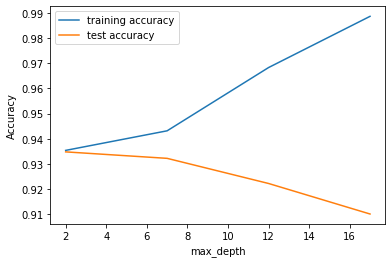

In [100]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### We can take the Max Depth as 7 from above graph as test accuracy is dropping after a depth of 7.

##### GridSearchCV to find optimal min_samples_leaf

In [101]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(1,40,2)}

# instantiate the model
rf = DecisionTreeClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca_1, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(1, 40, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

##### scores of GridSearch CV

In [102]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.411666,0.033272,0.004798,0.000400,1,{'min_samples_leaf': 1},0.907187,0.903617,0.908355,0.903832,0.901214,0.904841,0.002589,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.484927,0.053802,0.005797,0.001326,3,{'min_samples_leaf': 3},0.886007,0.876487,0.883123,0.882885,0.877648,0.881230,0.003591,2,0.960607,0.960845,0.959657,0.961026,0.961442,0.960715,0.000595
2,0.476172,0.125211,0.005198,0.001469,5,{'min_samples_leaf': 5},0.862208,0.852451,0.856463,0.861700,0.858129,0.858190,0.003589,3,0.927522,0.925617,0.924729,0.926336,0.925562,0.925953,0.000935
3,0.549293,0.181512,0.005997,0.002096,7,{'min_samples_leaf': 7},0.848644,0.834365,0.842418,0.841704,0.841228,0.841672,0.004534,4,0.896995,0.901458,0.902237,0.902416,0.902832,0.901188,0.002143
4,0.458239,0.058816,0.005798,0.000748,9,{'min_samples_leaf': 9},0.834841,0.818658,0.830755,0.830517,0.830279,0.829009,0.005443,6,0.878310,0.883666,0.887183,0.887243,0.884327,0.884146,0.003260


##### plotting accuracies with min_samples_leaf

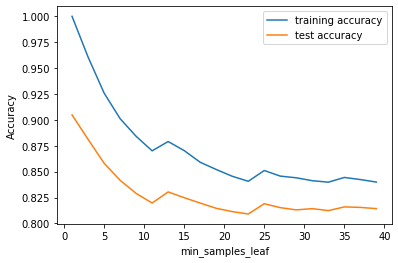

In [103]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### We can consider 10-25 samples as Training accuracy is going high and high as we decrease no of samples.

##### GridSearchCV to find optimal min_samples_leaf

In [104]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5,50,2)}

# instantiate the model
rf = DecisionTreeClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca_1, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 50, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_sco

##### scores of GridSearch CV

In [105]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.433370,0.029105,0.004999,0.000002,5,{'min_samples_split': 5},0.899096,0.890528,0.900500,0.894787,0.893359,0.895654,0.003678,1,0.986849,0.987920,0.988457,0.988576,0.988099,0.987980,0.000613
1,0.464931,0.082284,0.005597,0.000800,7,{'min_samples_split': 7},0.892194,0.883865,0.894311,0.890502,0.889074,0.889989,0.003526,2,0.975662,0.975186,0.978163,0.978044,0.978996,0.977210,0.001502
2,0.416171,0.045621,0.004798,0.000980,9,{'min_samples_split': 9},0.888149,0.877915,0.883361,0.885027,0.880029,0.882896,0.003616,3,0.965724,0.966677,0.967393,0.967095,0.968523,0.967082,0.000914
3,0.384952,0.019365,0.004998,0.001265,11,{'min_samples_split': 11},0.883151,0.866968,0.875506,0.878600,0.874316,0.875708,0.005332,4,0.956561,0.955668,0.957932,0.956623,0.957813,0.956919,0.000849
4,0.406188,0.038177,0.005997,0.002607,13,{'min_samples_split': 13},0.876725,0.857925,0.872173,0.874078,0.869317,0.870043,0.006525,5,0.947456,0.946266,0.951684,0.948947,0.951386,0.949148,0.002128


##### plotting accuracies with min_samples_split

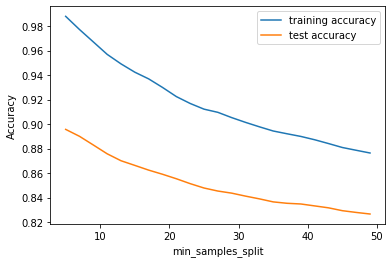

In [106]:
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Range of 20 to 40 seems to have good accuracy for min_samples_split

Accuracy is increased bur Recall was reduced which is not accepted, as we did not go with optimal parameters

##### Grid Search to find the Optimal Hyperparameters

In [107]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# Create the parameter grid 
param_grid = {
    'max_depth': [7],
    'min_samples_leaf': [10,15,20,25],
    'min_samples_split': [20,30,40],
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight = 'balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca_1,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   46.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [7],
                         'min_samples_leaf': [10, 15,

##### printing the optimal accuracy score and hyperparameters

In [108]:
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8467653639263103
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


##### Running the model with optimal Hyperparameters obtained before

In [109]:
clf_entropy = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=7, 
                                  min_samples_leaf=15,
                                  min_samples_split=20,class_weight = 'balanced')
clf_entropy.fit(X_train_pca_1, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

##### classification metrics

In [110]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_entropy.predict(X_test_pca_1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.85      0.91      8226
         1.0       0.32      0.74      0.45       778

    accuracy                           0.84      9004
   macro avg       0.65      0.80      0.68      9004
weighted avg       0.92      0.84      0.87      9004



In [111]:
print(confusion_matrix(y_test,y_pred))

[[7016 1210]
 [ 204  574]]


In [112]:
print("Accuracy {}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity {}".format(metrics.recall_score(y_test, y_pred)))

Accuracy 0.842958685028876
Recall/Sensitivity 0.7377892030848329


## Random Forest Classifier

In [113]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight = 'balanced')

#### Tuning the Max Depth

##### GridSearchCV to find optimal n_estimators

In [114]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca_1, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

##### scores of GridSearch CV

In [115]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.238167,0.034048,0.018390,0.004452,2,{'max_depth': 2},0.924322,0.927416,0.924780,0.932159,0.923828,0.926501,0.003089,4,0.924189,0.924487,0.924729,0.934428,0.925622,0.926691,0.003898
1,0.567220,0.084257,0.022600,0.009777,7,{'max_depth': 7},0.936935,0.938601,0.935968,0.932873,0.931683,0.935212,0.002567,2,0.938233,0.939542,0.939545,0.940795,0.940676,0.939758,0.000931
2,0.939188,0.049497,0.040998,0.032229,12,{'max_depth': 12},0.933841,0.940029,0.937396,0.932159,0.933349,0.935355,0.002917,1,0.963820,0.961202,0.964417,0.963525,0.961740,0.962941,0.001246
3,0.895692,0.274502,0.020788,0.001326,17,{'max_depth': 17},0.933127,0.937887,0.933349,0.927874,0.930255,0.932499,0.003364,3,0.984885,0.984350,0.986671,0.987623,0.986433,0.985993,0.001203


##### plotting accuracies with max_depth

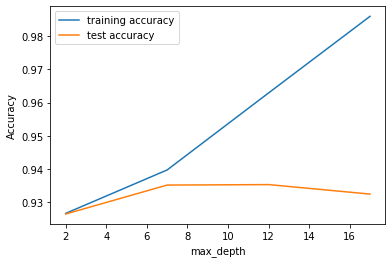

In [116]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### We can take the Max Depth as 7 from above graph as test accuracy is dropping after a depth of 7.

##### GridSearchCV to find optimal n_estimators

In [117]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca_1, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                

##### scores of GridSearch CV

In [118]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.385676,0.455243,0.118342,0.027749,100,{'n_estimators': 100},0.853403,0.855307,0.843847,0.846703,0.855273,0.850907,0.004736,4,0.846831,0.862481,0.847673,0.857015,0.853981,0.853596,0.005859
1,15.911067,0.704449,0.463883,0.049729,500,{'n_estimators': 500},0.861733,0.843646,0.856939,0.848607,0.855273,0.853239,0.006379,3,0.852365,0.850759,0.862847,0.859812,0.858324,0.856821,0.004563
2,27.326293,0.911277,0.849923,0.111885,900,{'n_estimators': 900},0.861970,0.847692,0.854082,0.848846,0.860033,0.854525,0.005743,2,0.854627,0.854389,0.859395,0.859395,0.862311,0.858023,0.003063
3,38.504733,3.933306,1.326273,0.242378,1300,{'n_estimators': 1300},0.863160,0.848168,0.854320,0.852416,0.858605,0.855334,0.005155,1,0.855222,0.854865,0.859990,0.862728,0.861062,0.858773,0.003170


##### plotting accuracies with n_estimators

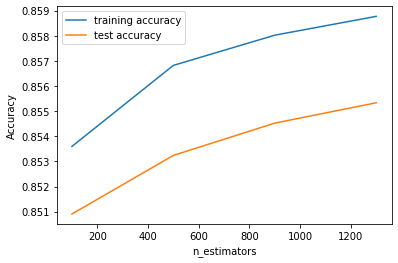

In [119]:
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### We can use n_estimators as 500 as aacuracy has gone high till that point and remained constant from there.

In [120]:
X_train_pca_1.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.005498,0.041935,-0.097238,0.161586,-0.016296,-0.029468,-0.013127,0.005241
1,0.020654,-0.078556,0.035846,0.047108,-0.015938,-0.002523,-0.014271,0.000488
2,-0.015836,0.030299,-0.007076,-0.054146,-0.012626,-0.026568,0.005011,-0.008595
3,-0.010347,-0.042594,-0.047991,-0.020574,-0.008371,0.091561,-0.028262,0.013522
4,-0.003489,0.051027,0.030301,-0.053366,-0.012001,-0.011687,0.010090,-0.022966


##### GridSearchCV to find optimal max_features

In [122]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': range(1,9,2)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca_1, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                

##### scores of GridSearch CV

In [123]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.210528,0.011325,0.015983,0.002761,1,{'max_features': 1},0.773679,0.837220,0.785765,0.823375,0.810997,0.806207,0.023476,4,0.772984,0.845225,0.785434,0.838629,0.812448,0.810944,0.028410
1,0.423661,0.013953,0.014192,0.001164,3,{'max_features': 3},0.866016,0.839362,0.857891,0.846227,0.861224,0.854144,0.009862,3,0.857185,0.848735,0.863918,0.856242,0.862609,0.857738,0.005394
2,0.603290,0.023605,0.012428,0.000740,5,{'max_features': 5},0.884579,0.857211,0.857653,0.850512,0.876934,0.865378,0.013035,1,0.872359,0.866706,0.864632,0.860228,0.874271,0.867639,0.005120
3,0.933784,0.078784,0.017190,0.005151,7,{'max_features': 7},0.860781,0.857211,0.844799,0.848846,0.860985,0.854525,0.006556,2,0.849390,0.862243,0.853386,0.864156,0.859931,0.857821,0.005566


##### plotting accuracies with max_features

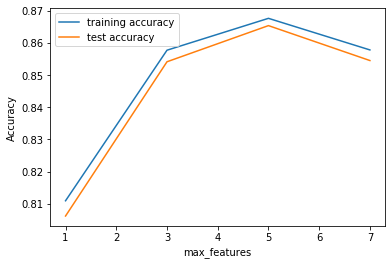

In [124]:
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### 5 can be taken as max features, as the accuracy is high there.

##### GridSearchCV to find optimal min_samples_leaf

In [125]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(1,40,2)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca_1, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

##### scores of GridSearch CV

In [126]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.851948,0.138475,0.022588,0.003135,1,{'min_samples_leaf': 1},0.934079,0.935983,0.935492,0.929541,0.928826,0.932784,0.003014,1,0.991729,0.991074,0.990004,0.992205,0.991253,0.991253,0.000738
1,0.766277,0.079541,0.020989,0.004047,3,{'min_samples_leaf': 3},0.933365,0.929081,0.929541,0.924066,0.926922,0.928595,0.003072,2,0.977031,0.976436,0.976734,0.977211,0.975663,0.976615,0.000544
2,0.765476,0.188002,0.023986,0.009460,5,{'min_samples_leaf': 5},0.927178,0.922418,0.921447,0.918353,0.920733,0.922026,0.002905,3,0.959060,0.960190,0.958527,0.957337,0.961026,0.959228,0.001285
3,0.662292,0.107872,0.017191,0.001598,7,{'min_samples_leaf': 7},0.916706,0.914802,0.917877,0.906927,0.915496,0.914362,0.003863,4,0.946564,0.945730,0.947757,0.944901,0.951208,0.947232,0.002201
4,0.693000,0.113438,0.022189,0.004994,9,{'min_samples_leaf': 9},0.917182,0.907187,0.914306,0.904785,0.911926,0.911077,0.004542,5,0.938709,0.935198,0.938474,0.938772,0.939188,0.938068,0.001454


##### plotting accuracies with min_samples_leaf

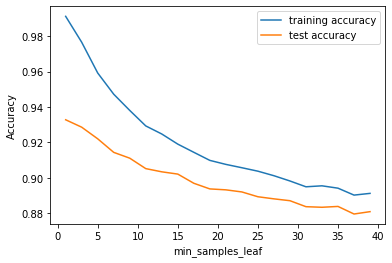

In [127]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### We can consider 10-20 samples as Training accuracy is going high and high as we decrease no of samples.

##### GridSearchCV to find optimal min_samples_leaf

In [128]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5,50,2)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca_1, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

##### scores of GridSearch CV

In [129]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.731441,0.176941,0.020191,0.007410,5,{'min_samples_split': 5},0.935507,0.935507,0.933587,0.928112,0.930731,0.932689,0.002880,1,0.988932,0.990420,0.988278,0.987921,0.989528,0.989016,0.000892
1,0.581066,0.120050,0.018191,0.004353,7,{'min_samples_split': 7},0.931461,0.935745,0.932397,0.928588,0.930017,0.931642,0.002425,2,0.983041,0.984647,0.984708,0.986076,0.984708,0.984636,0.000962
2,0.610311,0.031731,0.016791,0.002783,9,{'min_samples_split': 9},0.935745,0.933127,0.927874,0.925732,0.928112,0.930119,0.003715,3,0.977626,0.979411,0.980602,0.979472,0.982030,0.979828,0.001456
3,0.591192,0.076990,0.017248,0.002513,11,{'min_samples_split': 11},0.934079,0.930509,0.927636,0.925018,0.925732,0.928595,0.003336,4,0.975186,0.976079,0.974533,0.976139,0.975425,0.975472,0.000597
4,0.542096,0.092959,0.018791,0.002558,13,{'min_samples_split': 13},0.928843,0.926464,0.928826,0.922399,0.921209,0.925549,0.003199,5,0.972092,0.970783,0.971260,0.972867,0.972034,0.971807,0.000722


##### plotting accuracies with min_samples_split

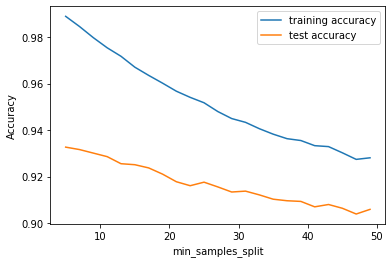

In [130]:
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Range of 20 to 40 seems to have good accuracy for min_samples_split

In [131]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [7],
    'min_samples_leaf': [10,15,20],
    'min_samples_split': [20,30,40],
    'n_estimators': [500], 
    'max_features': [5]
}
# Create a based model
rfc = RandomForestClassifier(class_weight = 'balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,return_train_score=True)

In [132]:
grid_search.fit(X_train_pca_1,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  7.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

##### printing the optimal accuracy score and hyperparameters

In [133]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)
#print("best accuracy", grid_search.best_score_)
#print(grid_search.best_estimator_)

We can get accuracy of 0.8906078926072262 using {'max_depth': 7, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 500}


##### model with the best hyperparameters

In [136]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=10, 
                             min_samples_split=20,
                             max_features=5,
                             n_estimators=500,class_weight = 'balanced')

In [137]:
rfc.fit(X_train_pca_1,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=7, max_features=5,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=20, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

##### Making predictions

In [138]:
predictions = rfc.predict(X_test_pca_1)

##### Let's check the report of our final model

In [139]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.97      0.90      0.94      8226
         1.0       0.41      0.72      0.52       778

    accuracy                           0.89      9004
   macro avg       0.69      0.81      0.73      9004
weighted avg       0.92      0.89      0.90      9004



##### Printing confusion matrix

In [140]:
print(confusion_matrix(y_test,predictions))

[[7424  802]
 [ 221  557]]


In [141]:
print("Accuracy {}".format(metrics.accuracy_score(y_test, predictions)))
print("Recall/Sensitivity {}".format(metrics.recall_score(y_test, predictions)))


Accuracy 0.8863838294091515
Recall/Sensitivity 0.7159383033419023


In [142]:
#### Since with Logistic regression created before we can explian the features to consider, we will use it to find the important features

In [152]:
importance = logreg_1.coef_

In [153]:
importance

array([[  4.34524218,  -5.89442153,   7.69336073, -12.91538694,
         -6.01727537, -10.5715991 ,  -7.82767061,  -6.26639405,
        -11.74732481,  -5.94296602,  -8.93871139,   7.48503921]])

In [158]:
X_train_rfe.columns

Index(['roam_og_mou_7', 'loc_og_t2m_mou_8', 'std_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2m_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'monthly_2g_8',
       'monthly_3g_8', 'avg_rech_amt'],
      dtype='object')

### Based on the values std_og_mou_7,avg_rech_amt,roam_og_mou_7,oc_og_t2m_mou_8,monthly_2g_8 are having the greater importance